In [488]:
from docx import Document #library to read .doc and .docx files into the enviornment
import pandas as pd #data processing library
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import re
% matplotlib inline

In [489]:
# reading the raw data
document = Document("test.docx")

In [490]:
for row in document.paragraphs:
    print(row.text)

Kseniya Kamen
Graduate Consultant at Technical Department of REPL


Previous Experience 
Jo Malone, London: Russian Language Interpreter 
(May 2018 - June 2018)
Key Achievements: 
Assisting Global Stylist of the Year and participating in workshops and presentations for English-to-Russian translations

Kylin Prime Group (The Chinese Weekly), London: PR and Marketing Intern
(January 2018 – April 2018)
Key Achievements: 
Assisting with marketing campaigns and managing social media platforms
Creating, scheduling and managing posts across multiple social media platforms 
Writing, editing and generating ideas for social media content, account maintenance and profile updates.

Ferver Consultancy, London: Intern
(June 2017 – August 2017)
Key Achievements: 
Social media management and content creation
Self-motivation and ability to work independently to assigned projects

Education and Certifications
Queen Mary University of London, Computing and Information Systems MSc (September 2018 – Presen

# Pre-processing the data

In [516]:
#converting the data
test_list = [str(row.text.strip()) for row in document.paragraphs]
while("" in test_list): 
    test_list.remove("")

clean_lst = []
for row in test_list:
    row = row.replace("(", "")
    row = row.replace(")", "")
    row = row.replace(".", "")
    row = row.replace(":", "")
    row = row.replace(",", "")
    row = row.replace("•", "")
    row = row.replace("  ", " ")
    row = row.strip()
    clean_lst.append(row)
name = test_list[0]
dataset = pd.DataFrame(clean_lst[1:], columns= ["info"])

In [517]:
#getting the index of the 3 different paragraph sections
i = 0
dicts = dict()
drop_idx = []
for row in dataset["info"]:
    i += 1
    if row == "Previous Experience" or row == "Education and Certifications" or row == "Skills":
        dicts[row] = i
    elif row == "Key Achievements":
        drop_idx.append(i-1)
    else:
        
        pass
print(dicts)
idx = [i for i in dicts.values()]
idx

{'Previous Experience': 2, 'Education and Certifications': 18, 'Skills': 25}


[2, 18, 25]

In [518]:
dataset = dataset.drop(drop_idx)

In [540]:
#splitting the data into the  subset
sub_data_past = dataset[idx[0] :idx[1]]
sub_data_achiv = dataset[idx[1]:idx[2]]
sub_data_skills = dataset[idx[2]:]
if len(sub_data_skills) == 0:
    print("Skills are collected in table format. We will ignore this subset")

Skills are collected in table format. We will ignore this subset


In [541]:
sub_data_past.head(10)

,info
2,Jo Malone London Russian Language Interpreter
3,May 2018 - June 2018
5,Assisting Global Stylist of the Year and parti...
6,Kylin Prime Group The Chinese Weekly London PR...
7,January 2018 – April 2018
9,Assisting with marketing campaigns and managin...
10,Creating scheduling and managing posts across ...
11,Writing editing and generating ideas for socia...
12,Ferver Consultancy London Intern
13,June 2017 – August 2017


In [542]:
sub_data_achiv.head(10)

,info
21,Westminster University Public Relations and Ad...
22,Academic Grade 21 Upper Second Class Honours
23,Modules Professional Practice & Employability ...
24,Skills


In [543]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))

#Creating a list of custom stopwords
new_words = ["using","january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december"]
stop_words = stop_words.union(new_words)

In [546]:
corpus = []
for i in sub_data_achiv['info']:
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', i)
    
    text = re.sub(" \d+", " ", text)
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    
    ##Stemming
    ps=PorterStemmer()
    
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [547]:
corpus

['westminster university public relation advertising ba',
 'academic grade upper second class honour',
 'module professional practice employability pr advertising global practice issue pr advertising online advertising public relation campaigning persuasive skill public relation advertising theory medium communication',
 'skill']

In [548]:
corpus_1 = []
for i in sub_data_past['info']:
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', i)
    
    text = re.sub(" \d+", " ", text)
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    
    ##Stemming
    ps=PorterStemmer()
    
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus_1.append(text)

In [549]:
corpus_1

['jo malone london russian language interpreter',
 '',
 'assisting global stylist year participating workshop presentation english russian translation',
 'kylin prime group chinese weekly london pr marketing intern',
 '',
 'assisting marketing campaign managing social medium platform',
 'creating scheduling managing post across multiple social medium platform',
 'writing editing generating idea social medium content account maintenance profile update',
 'ferver consultancy london intern',
 '',
 'social medium management content creation',
 'self motivation ability work independently assigned project',
 'education certification',
 'queen mary university london computing information system msc present',
 'module information system computer programming java database system sqlite postgresql security authentication cloud computing interactive system design bayesian decision risk analysis agenarisk',
 'acquired skill principle component dbms implementation database object relational databas

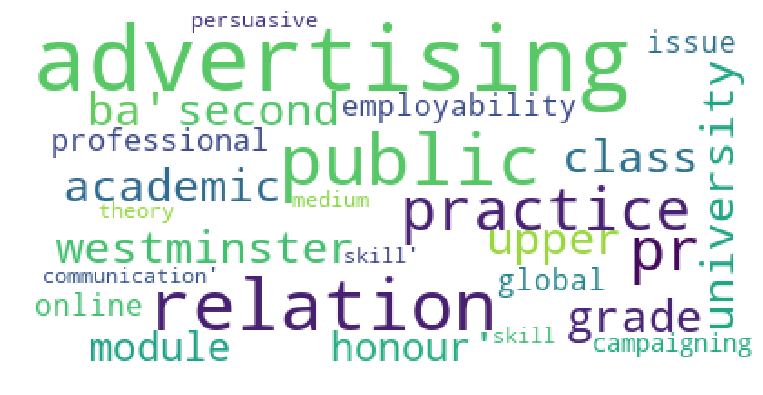

In [552]:
#Word cloud
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

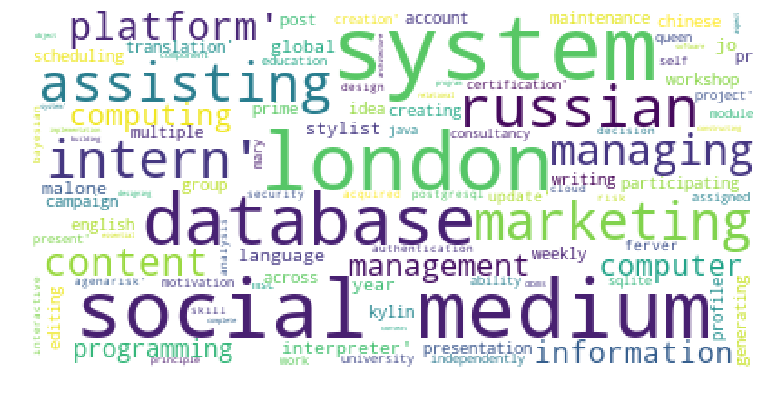

In [553]:
#Word cloud
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus_1))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [501]:
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [533]:
list(cv.vocabulary_.keys())[:10]

['westminster',
 'university',
 'public',
 'relation',
 'advertising',
 'ba',
 'westminster university',
 'university public',
 'public relation',
 'relation advertising']

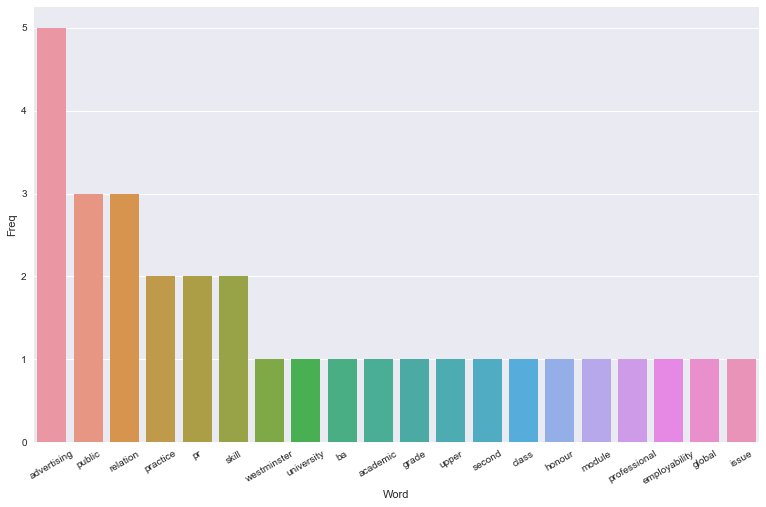

In [534]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]


#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]


#Barplot of most freq words
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.show()

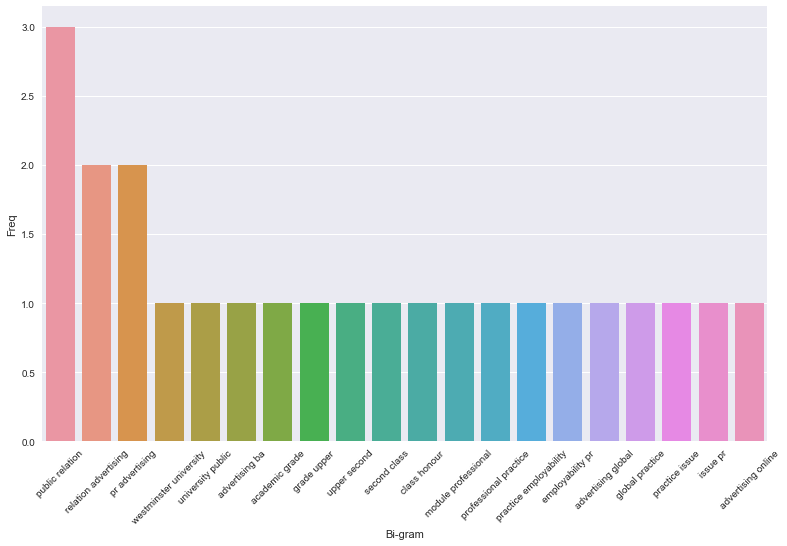

In [535]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
#Barplot of most freq Bi-grams

sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)
plt.show()

## Converting to a matrix of integers

In [537]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[len(corpus)//2]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [538]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [539]:
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,10)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
module professional practice employability pr advertising global practice issue pr advertising online advertising public relation campaigning persuasive skill public relation advertising theory medium communication

Keywords:
advertising 0.35
practice 0.222
pr advertising 0.222
pr 0.222
relation 0.175
public relation 0.175
public 0.175
theory medium communication 0.111
theory medium 0.111
theory 0.111


# Table manipulation

In [508]:
# ready tables
table = document.tables[0]

# creating dictionary that holds the values
keys = None
for i, row in enumerate(table.rows):
    text = (cell.text for cell in row.cells)

    if i == 0:
        keys = tuple(text)
        continue
    row_data = dict(zip(keys, text))

    
#manipulating the data structure to allow easier and more comperhensive key word   
skils_n_lang = [row[1] for row in row_data.items()]
elements = []
for row in skils_n_lang:
    row = row.split("\n")
    elements.append(row)
final_skills = []
for sublist in elements:
    for item in sublist:
        final_skills.append(item)

print(final_skills)

['Java', 'MySQL', 'Microsoft Office Suit', 'Adobe XD', 'English (Fluent)', 'Russian (Fluent)', 'Greek (Intermediate)']
